# DSCI 100 Group Project Proposal [Group 17]
## Factors of Patients in Heart Disease

In [10]:
library(tidyverse)
library(tidymodels)

### Introduction

#### Background Information

In the United States and Canada, heart disease is one of the leading causes of death among most age, gender, and racial groups. There are many lifestyle risk factors and contributors to heart disease in a person, and it is a growing issue that requires further awareness and analysis to tackle. In particular, risk of heart disease has been observed to increase with age and high cholesterol levels, due to fatty deposits that build up and cause blockages in major arteries. The classification question we would like to answer with our project is the following: **Are the factors of age and cholesterol levels able to predict the presence of heart disease in a patient?** We have chosen to use serum cholesterol results as one of our main predictors due to its ability to show a variety of heart related information, such as if the patient has had a previous heart attack and/or high blood pressure.

The ‘processed-cleveland.data’ dataset we will be using has data on the medical info of 303 patients, consisting of 14 attributes *(listed in appendix)

Parsed with column specification:
cols(
  age = col_double(),
  sex = col_double(),
  cp = col_double(),
  trestbps = col_double(),
  chol = col_double(),
  fbs = col_double(),
  restecg = col_double(),
  thalach = col_double(),
  exang = col_double(),
  oldpeak = col_double(),
  slope = col_double(),
  ca = col_character(),
  thal = col_character(),
  num = col_double()
)



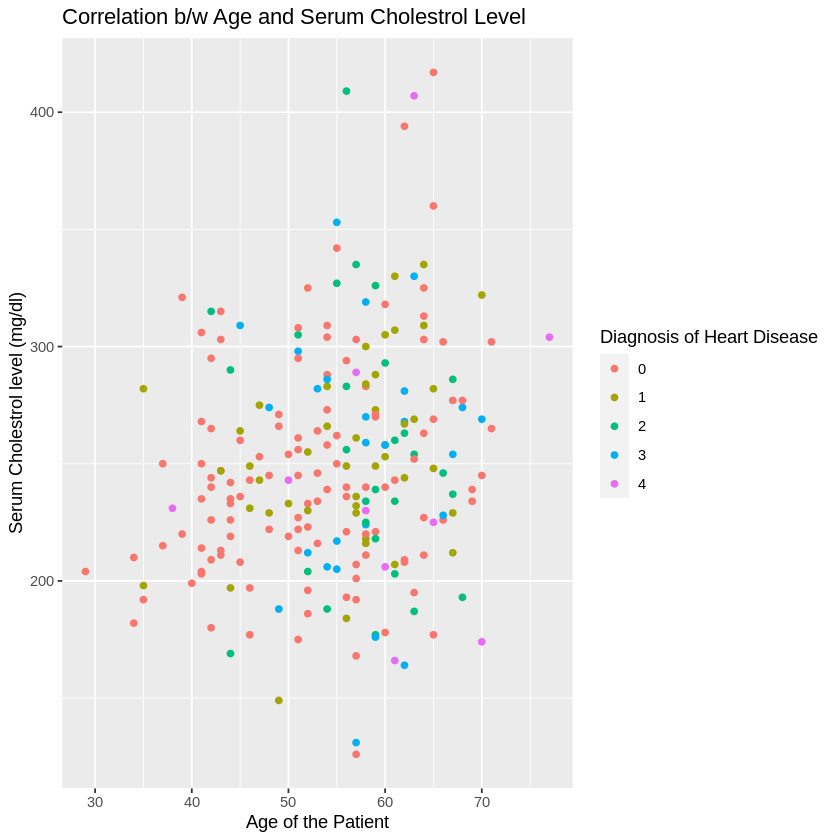

In [12]:
#prelim data analysis


data <- read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data", col_names=c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"))

set.seed(87)
filtered <- data %>% select(chol, num, age)
#filtered
split <- initial_split(filtered, prop = 0.75, Strata = num)
train <- training(split)
test <- testing(split)
plot1 <- train %>%
        ggplot(aes(x=age,y=chol, color = as_factor(num))) +
        geom_point() +
        labs(x="Age of the Patient", y = "Serum Cholestrol level (mg/dl)", color="Diagnosis of Heart Disease") +
        ggtitle("Correlation b/w Age and Serum Cholestrol Level")
plot1

### Methodology

To conduct our data analysis we will firstly read in our dataset from the internet into R, then proceed to tidy it up by adding variable titles to all 14 columns of the dataset. For our data analysis we will be using the variables “age (in years)”, “serum cholesterol (in mg/dl)”, and “diagnosis of heart disease”. The first two of the listed variables were chosen to be analyzed in order to explore how these important factors of a patient can be used to predict the presence of heart disease. The last variable was chosen for our data analysis because it is the value that we are ultimately using to predict the presence of heart disease. These columns of data will be extracted using the “select” function in R.     
Furthermore, to conduct our analysis and resolve our classification problem we will split the dataset into a training and testing set, then create a classifier using the training set, and test the accuracy of the classifier using the testing set. Ultimately, the goal is to create a classifier (using K-nearest neighbours) capable of predicting the presence of heart disease based on features of the patient. The two variables of “age” and “cholesterol” will be standardized to ensure that both variables are equally significant in the creation of the classifier. Lastly, we will evaluate the accuracy, and tune the classifier as needed to maximize its accuracy.
One way to effectively visualize the results of our preliminary data analysis is through a scatter plot of age against cholesterol, and then using coloured data points for the presence or absence of heart disease.

### Expected Outcomes and Significance

To conduct our data analysis we will firstly read in our dataset from the internet into R, then proceed to tidy it up by adding variable titles to all 14 columns of the dataset. For our data analysis we will be using the variables “age (in years)”, “serum cholesterol (in mg/dl)”, and “diagnosis of heart disease”. The first two of the listed variables were chosen to be analyzed in order to explore how these important factors of a patient can be used to predict the presence of heart disease. The last variable was chosen for our data analysis because it is the value that we are ultimately using to predict the presence of heart disease. These columns of data will be extracted using the “select” function in R.
Furthermore, to conduct our analysis and resolve our classification problem we will split the dataset into a training and testing set, then create a classifier using the training set, and test the accuracy of the classifier using the testing set. Ultimately, the goal is to create a classifier (using K-nearest neighbours) capable of predicting the presence of heart disease based on features of the patient. The two variables of “age” and “cholesterol” will be standardized to ensure that both variables are equally significant in the creation of the classifier. Lastly, we will evaluate the accuracy, and tune the classifier as needed to maximize its accuracy.
One way to effectively visualize the results of our preliminary data analysis is through a scatter plot of age against cholesterol, and then using coloured data points for the presence or absence of heart disease.

***
## Appendix

#### Bibliography

* Centers for Disease Control and Prevention. (2022, February 7). *Heart disease facts.* Centers for Disease Control and Prevention. Retrieved March 5, 2022, from https://www.cdc.gov/heartdisease/facts.htm

* *ECG (electrocardiogram): When you need it and when you don't.* Choosing Wisely Canada. (2019, January 22). Retrieved March 5, 2022, from https://choosingwiselycanada.org/ecg-electrocardiogram/#:~:text=An%20ECG%20(electrocardiogram)%20records%20the,heart%20attack%20(myocardial%20infarction).

* *Heart risk & prevention.* Heart and Stroke Foundation of Canada. (n.d.). Retrieved March 5, 2022, from https://www.heartandstroke.ca/heart-disease/risk-and-prevention

* Mayo Foundation for Medical Education and Research. (2021, July 20). *High cholesterol.* Mayo Clinic. Retrieved March 5, 2022, from https://www.mayoclinic.org/diseases-conditions/high-blood-cholesterol/symptoms-causes/syc-20350800


#### *Processed Cleveland Data Set Attributes

* age
* sex
* cp (chest pain type)
  * 1–typical angina
  * 2–atypical angina
  * 3–non-anginal pain
  * 4–asymptomatic
* trestbps (resting blood pressure on admission to hospital, in mmHg)
* chol (serum cholesterol, in mg/dl)
* fbs (fasting blood sugar > 120 mg/dl)
  * 1–true
  * 0–false
* restecg (resting electrocardiographic results)
  * 0–normal resting ECG
  * 1–ST-T wave abnormality
  * 2–probable/definite left ventricular hypertrophy by Estes’ criteria
* thalach (maximum heart rate)
* exang (exercise induced angina)
  * 1–true
  * 0–false
* oldpeak (ST depression induced by exercise relative to rest)
* slope (the slope of peak exercise ST segment)
  * 1–upsloping
  * 2–flat
  * 3–downsloping
* ca (number of major vessels colored by fluoroscopy)
* thal
  * 3–normal
  * 6–fixed defect
  * 7–reversible defect
* num (diagnosis of heart disease) (predicted value)
  * 0–**<50%** diameter narrowing
  * 1–**>50%** diameter narrowing

<font color=gray>Group 17 members: Alex Caceres-Wright, Alyanna Llavore and Abdul Faiz</font>